In [1]:
#Importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [2]:
#importing the data
data = pd.read_csv("alcohol-quality-data.csv")

In [3]:
data

,Quality_Category,density,pH,sulphates,alcohol
0,Low,1.001,3,0.45,8.8
1,Low,0.994,3,0.49,9.5
2,Low,0.995,3,0.44,10.1
3,Low,0.996,3,0.40,9.9
4,Low,0.996,3,0.40,9.9
...,...,...,...,...,...
4893,Low,0.991,3,0.50,11.2
4894,Low,0.995,3,0.46,9.6
4895,Low,0.993,3,0.46,9.4
4896,High,0.989,3,0.38,12.8


In [4]:
print(data.shape)
data['Quality_Category'].value_counts()

(4898, 5)


Low     3838
High    1060
Name: Quality_Category, dtype: int64

In [5]:
data.isnull().sum()

Quality_Category    0
density             0
pH                  0
sulphates           0
alcohol             0
dtype: int64

In [6]:
# Fetching all the numerical columns
num_feature = [feature for feature in data.columns if data[feature].dtype !='O']
num_feature

['density', 'pH', 'sulphates', 'alcohol']

In [7]:
from collections import Counter

# empty Counter
print(Counter(data['Quality_Category']))


Counter({'Low': 3838, 'High': 1060})


In [9]:
dataset = data.copy()

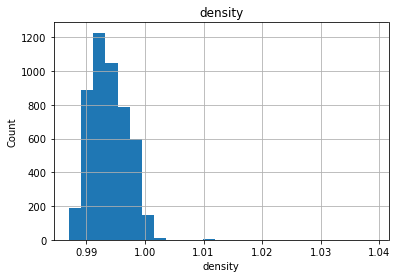

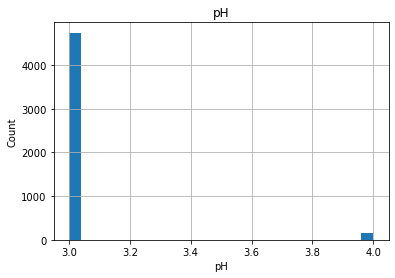

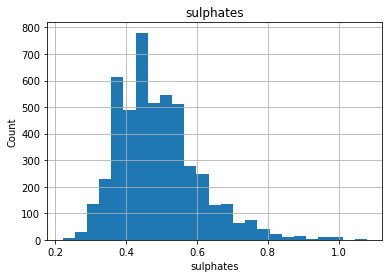

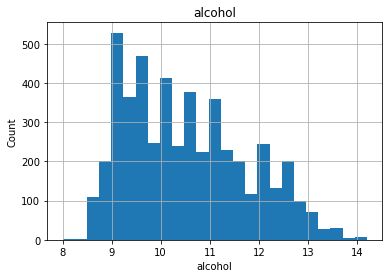

In [10]:
# Understanding the distribution of the numerical columns
for feature in num_feature:
    dataset[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()
    

In [12]:
# Preparing X and Y
dataset = data.copy()
Y = pd.DataFrame(dataset['Quality_Category'].replace({"Low":0,"High":1}))

X = dataset.drop(columns=['pH','Quality_Category','density']) 

### Feature Selection

[0.16029078 0.00674285 0.39956506 0.43340131]


C:\Users\Manthan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Manthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


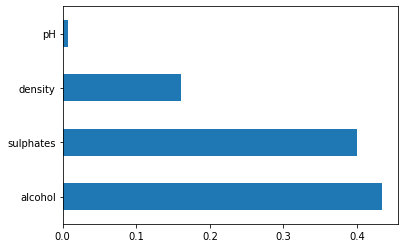

In [28]:
# There are many techniques but here i have used extratreeclassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)

print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### After Testing for random forest best suited columns are 'alcohol' and 'sulphates'

In [304]:
print(X.shape)
print(Y.shape)
X

(4898, 2)
(4898, 1)


,sulphates,alcohol
0,0.45,8.8
1,0.49,9.5
2,0.44,10.1
3,0.40,9.9
4,0.40,9.9
...,...,...
4893,0.50,11.2
4894,0.46,9.6
4895,0.46,9.4
4896,0.38,12.8


## For Random Forest 

Average 76.19 % accuracy




In [321]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,random_state=1)    #After trying variou values 500 gave the best results

In [322]:
from collections import Counter
print(Counter(prediction))
print(Counter(y1_test['Quality_Category']))

Counter({0: 415, 1: 74})
Counter({0: 383, 1: 106})


In [323]:
from sklearn.metrics import confusion_matrix
confusion_matrix(prediction, y1_test)

array([[344,  71],
       [ 39,  35]], dtype=int64)

### Stratified K Fold CV

In [324]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
accuracy=[]
skf = StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(X,Y)
for train_index,test_index in skf.split(X,Y):
    print("Train:",train_index,"Validation:",test_index)
    X1_train,X1_test= X.iloc[train_index], X.iloc[test_index]
    y1_train,y1_test= Y.iloc[train_index], Y.iloc[test_index]
    
    classifier.fit(X1_train,y1_train)
    prediction = classifier.predict(X1_test)
    score = accuracy_score(prediction,y1_test)
    accuracy.append(score)
print(accuracy)
np.array(accuracy).mean()

Train: [ 478  479  480 ... 4895 4896 4897] Validation: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 

C:\Users\Manthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Train: [   0    1    2 ... 4895 4896 4897] Validation: [478 479 480 481 482 483 484 485 486 487 488 489 490 492 493 494 495 496
 497 498 499 500 501 502 503 504 505 506 508 510 511 512 513 515 516 517
 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535
 536 537 538 539 540 541 542 543 544 545 546 547 549 556 557 558 559 561
 562 563 564 565 566 567 568 569 570 571 572 573 574 575 576 577 578 579
 580 581 582 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597
 598 599 600 601 602 603 604 605 606 607 608 609 610 611 612 613 614 615
 616 617 618 619 620 621 622 623 624 625 626 627 628 629 630 631 632 633
 634 635 636 637 638 639 640 641 642 643 644 645 646 647 648 649 650 651
 652 653 654 655 656 657 658 659 660 661 662 663 664 665 666 667 668 669
 670 671 672 673 674 675 676 677 678 679 680 681 682 683 684 685 686 687
 688 689 690 691 692 693 694 695 696 697 698 699 700 701 702 703 704 705
 706 707 708 709 710 711 712 713 714 715 716 717 718 719 720 721 722 

C:\Users\Manthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Train: [   0    1    2 ... 4895 4896 4897] Validation: [ 943  944  945  957  958  961  968  969  970  971  973  978  981  989
  994  995  996  997  998  999 1000 1001 1002 1003 1004 1005 1006 1007
 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017 1018 1019 1020 1021
 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031 1032 1033 1034 1035
 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045 1046 1047 1048 1049
 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059 1060 1061 1062 1063
 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073 1074 1075 1076 1077
 1078 1079 1080 1081 1082 1083 1084 1085 1086 1087 1088 1089 1090 1091
 1092 1093 1094 1095 1096 1097 1098 1099 1100 1101 1102 1103 1104 1105
 1106 1107 1108 1109 1110 1111 1112 1113 1114 1115 1116 1117 1118 1119
 1120 1121 1122 1123 1124 1125 1126 1127 1128 1129 1130 1131 1132 1133
 1134 1135 1136 1137 1138 1139 1140 1141 1142 1143 1144 1145 1146 1147
 1148 1149 1150 1151 1152 1153 1154 1155 1156 1157 1158 1159 1160 1161
 1162 1163 1164 1165 1

C:\Users\Manthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Train: [   0    1    2 ... 4895 4896 4897] Validation: [1362 1365 1371 1374 1375 1378 1380 1381 1386 1388 1394 1395 1396 1397
 1398 1400 1402 1403 1406 1408 1412 1419 1428 1432 1437 1453 1464 1467
 1470 1493 1494 1495 1497 1500 1503 1504 1505 1507 1508 1509 1510 1511
 1512 1513 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525
 1526 1527 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539
 1540 1541 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553
 1554 1555 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567
 1568 1569 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581
 1582 1583 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595
 1596 1597 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609
 1610 1611 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623
 1624 1625 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637
 1638 1639 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651
 1652 1653 1654 1655 1

C:\Users\Manthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Train: [   0    1    2 ... 4895 4896 4897] Validation: [1899 1907 1908 1915 1920 1937 1948 1952 1967 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029
 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043
 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057
 2058 2059 2060 2061 2062 2063 2064 2065 2066 2067 2068 2069 2070 2071
 2072 2073 2074 2075 2076 2077 2078 2079 2080 2081 2082 2083 2084 2085
 2086 2087 2088 2089 2090 2091 2092 2093 2094 2095 2096 2097 2098 2099
 2100 2101 2102 2103 2104 2105 2106 2107 2108 2109 2110 2111 2112 2113
 2114 2115 2116 2117 2118 2119 2120 2121 2122 2123 2124 2125 2126 2127
 2128 2129 2130 2131 2132 2133 2134 2135 2136 2137 2138 2139 2140 2141
 2142 2143 2144 2145 2

C:\Users\Manthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Train: [   0    1    2 ... 4895 4896 4897] Validation: [2415 2416 2417 2418 2419 2421 2422 2423 2424 2425 2426 2427 2428 2429
 2430 2431 2432 2433 2434 2435 2436 2437 2438 2439 2440 2441 2442 2443
 2444 2445 2446 2447 2448 2449 2450 2451 2453 2454 2455 2456 2457 2458
 2459 2460 2461 2462 2464 2465 2466 2467 2468 2469 2470 2472 2473 2475
 2476 2478 2479 2480 2481 2482 2483 2484 2485 2486 2487 2488 2489 2490
 2491 2492 2493 2494 2495 2496 2497 2498 2499 2500 2501 2502 2503 2504
 2505 2506 2508 2509 2510 2511 2512 2513 2516 2517 2519 2520 2523 2524
 2527 2528 2529 2530 2531 2532 2533 2535 2536 2537 2538 2539 2540 2541
 2542 2543 2544 2545 2546 2547 2548 2549 2550 2551 2552 2556 2559 2560
 2561 2562 2563 2564 2565 2567 2568 2569 2570 2571 2572 2573 2574 2575
 2576 2577 2579 2580 2587 2589 2590 2592 2593 2595 2596 2597 2598 2599
 2601 2602 2605 2606 2607 2608 2609 2610 2611 2613 2614 2615 2616 2617
 2618 2619 2620 2621 2622 2623 2624 2625 2626 2627 2628 2629 2630 2631
 2632 2633 2634 2635 2

C:\Users\Manthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Train: [   0    1    2 ... 4895 4896 4897] Validation: [2914 2915 2916 2918 2919 2920 2921 2923 2924 2925 2929 2932 2933 2934
 2935 2936 2937 2940 2941 2942 2944 2946 2947 2948 2949 2950 2951 2952
 2953 2955 2956 2957 2958 2961 2962 2964 2966 2967 2968 2969 2970 2971
 2972 2973 2974 2975 2976 2977 2978 2982 2983 2984 2989 2993 2994 2995
 2996 2997 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009
 3010 3011 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023
 3024 3025 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037
 3038 3039 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051
 3052 3053 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065
 3066 3067 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079
 3080 3081 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093
 3094 3095 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107
 3108 3109 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121
 3122 3123 3124 3125 3

C:\Users\Manthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Train: [   0    1    2 ... 4895 4896 4897] Validation: [3373 3378 3380 3381 3382 3386 3389 3391 3410 3414 3415 3419 3421 3422
 3433 3442 3445 3447 3448 3449 3450 3451 3452 3453 3454 3455 3456 3457
 3458 3459 3460 3461 3462 3463 3464 3465 3466 3467 3468 3469 3470 3471
 3472 3473 3474 3475 3476 3477 3478 3479 3480 3481 3482 3483 3484 3485
 3486 3487 3488 3489 3490 3491 3492 3493 3494 3495 3496 3497 3498 3499
 3500 3501 3502 3503 3504 3505 3506 3507 3508 3509 3510 3511 3512 3513
 3514 3515 3516 3517 3518 3519 3520 3521 3522 3523 3524 3525 3526 3527
 3528 3529 3530 3531 3532 3533 3534 3535 3536 3537 3538 3539 3540 3541
 3542 3543 3544 3545 3546 3547 3548 3549 3550 3551 3552 3553 3554 3555
 3556 3557 3558 3559 3560 3561 3562 3563 3564 3565 3566 3567 3568 3569
 3570 3571 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583
 3584 3585 3586 3587 3588 3589 3590 3591 3592 3593 3594 3595 3596 3597
 3598 3599 3600 3601 3602 3603 3604 3605 3606 3607 3608 3609 3610 3611
 3612 3613 3614 3615 3

C:\Users\Manthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Train: [   0    1    2 ... 4895 4896 4897] Validation: [3692 3693 3696 3720 3723 3726 3727 3728 3739 3740 3741 3742 3743 3744
 3745 3750 3754 3761 3764 3778 3779 3785 3815 3824 3829 3830 3843 3851
 3853 3864 3875 3898 3904 3905 3906 3907 3908 3909 3912 3914 3915 3918
 3922 3932 3947 3953 3962 3963 3968 3969 3970 3971 3972 3973 3974 3975
 3976 3977 3978 3979 3980 3981 3982 3983 3984 3985 3986 3987 3988 3989
 3990 3991 3992 3993 3994 3995 3996 3997 3998 3999 4000 4001 4002 4003
 4004 4005 4006 4007 4008 4009 4010 4011 4012 4013 4014 4015 4016 4017
 4018 4019 4020 4021 4022 4023 4024 4025 4026 4027 4028 4029 4030 4031
 4032 4033 4034 4035 4036 4037 4038 4039 4040 4041 4042 4043 4044 4045
 4046 4047 4048 4049 4050 4051 4052 4053 4054 4055 4056 4057 4058 4059
 4060 4061 4062 4063 4064 4065 4066 4067 4068 4069 4070 4071 4072 4073
 4074 4075 4076 4077 4078 4079 4080 4081 4082 4083 4084 4085 4086 4087
 4088 4089 4090 4091 4092 4093 4094 4095 4096 4097 4098 4099 4100 4101
 4102 4103 4104 4105 4

C:\Users\Manthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Train: [   0    1    2 ... 4434 4435 4436] Validation: [4242 4261 4266 4267 4276 4307 4314 4315 4317 4318 4319 4322 4332 4333
 4334 4335 4336 4337 4338 4339 4340 4347 4406 4409 4411 4412 4413 4414
 4437 4438 4439 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450
 4451 4452 4453 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464
 4465 4466 4467 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478
 4479 4480 4481 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492
 4493 4494 4495 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506
 4507 4508 4509 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520
 4521 4522 4523 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534
 4535 4536 4537 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548
 4549 4550 4551 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562
 4563 4564 4565 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576
 4577 4578 4579 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590
 4591 4592 4593 4594 4

C:\Users\Manthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


[0.7959183673469388, 0.753061224489796, 0.7510204081632653, 0.8040816326530612, 0.7857142857142857, 0.7918367346938775, 0.7612244897959184, 0.7551020408163265, 0.7014314928425358, 0.7198364008179959]


0.7619227077334001


## For Decision Tree
For Decision Tree, accuracy ranges from 71% to 80%

Average 76%

In [328]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

### Stratified K Fold CV

In [329]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
accuracy=[]
skf = StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(X,Y)
for train_index,test_index in skf.split(X,Y):
    print("Train:",train_index,"Validation:",test_index)
    X1_train,X1_test= X.iloc[train_index], X.iloc[test_index]
    y1_train,y1_test= Y.iloc[train_index], Y.iloc[test_index]
    
    clf.fit(X1_train,y1_train)
    prediction = clf.predict(X1_test)
    score = accuracy_score(prediction,y1_test)
    accuracy.append(score)
print(accuracy)
np.array(accuracy).mean()

Train: [ 478  479  480 ... 4895 4896 4897] Validation: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 

0.7588627352781604

## For KNN

### Feature Scaling
Remember for algorithms like Linear Regression, K-NN,K-means and for all Neural Network, Feature Scaling is required because they are based on distance equations like Manhattan, euclidean distance etc. Hence, Require Scaling ....

Average 80% for 2 best columns

Here, we can take the accuracy by increasing the neighbours so that accuracy becomes 81%. But the issue is that this may will lead to overfitting and when the new inputs comes it might come across as a bad fit for us.

Hence, In final model, if want to use only two columns ('sulfates','alcohol') then K-NN algorithm works well after testing and comparing with other algorithms. 

But here after applying scaling, i realised that it does not make any much of the difference in output.
Hence, later i have not used it in any algorithms.

In [330]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_tr = scaler.fit_transform(X)
X_tr = pd.DataFrame(X_tr, columns=['sulphates','alcohol'])
# Here we does not require Y to be Scale as it already contains values like 0 and 1.


### Stratified K Fold CV


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=125)  #After trying out many different values ranging from 1 - 500 ...125 gave the best results

In [16]:
from sklearn.metrics import accuracy_score
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
score = accuracy_score(prediction,y_test)

print(score)

0.7928571428571428


C:\Users\Manthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [342]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
accuracy=[]
skf = StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(X,Y)
for train_index,test_index in skf.split(X,Y):
    print("Train:",train_index,"Validation:",test_index)
    X1_train,X1_test= X.iloc[train_index], X.iloc[test_index]
    y1_train,y1_test= Y.iloc[train_index], Y.iloc[test_index]
    
    clf.fit(X1_train,y1_train)
    prediction = clf.predict(X1_test)
    score = accuracy_score(prediction,y1_test)
    accuracy.append(score)
print(accuracy)
np.array(accuracy).mean()

Train: [ 478  479  480 ... 4895 4896 4897] Validation: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 

C:\Users\Manthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Manthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Manthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Manthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was ex

 [   0    1    2 ... 4895 4896 4897] Validation: [2914 2915 2916 2918 2919 2920 2921 2923 2924 2925 2929 2932 2933 2934
 2935 2936 2937 2940 2941 2942 2944 2946 2947 2948 2949 2950 2951 2952
 2953 2955 2956 2957 2958 2961 2962 2964 2966 2967 2968 2969 2970 2971
 2972 2973 2974 2975 2976 2977 2978 2982 2983 2984 2989 2993 2994 2995
 2996 2997 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009
 3010 3011 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023
 3024 3025 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037
 3038 3039 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051
 3052 3053 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065
 3066 3067 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079
 3080 3081 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093
 3094 3095 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107
 3108 3109 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121
 3122 3123 3124 3125 3126 31

C:\Users\Manthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Manthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Manthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Manthan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was ex

0.7948073953507784

In [319]:
from collections import Counter
print(Counter(prediction))
print(Counter(y1_test['Quality_Category']))

Counter({0: 415, 1: 74})
Counter({0: 383, 1: 106})


In [320]:
from sklearn.metrics import confusion_matrix
confusion_matrix(prediction, y1_test)

array([[344,  71],
       [ 39,  35]], dtype=int64)

### Feature Transformation
I have tried both scaling and tranformation but both does not make any difference.

In [56]:
def diagnostic_plots(df,variable):
    #Function to plot the histogram
    #Side by side for a certain variable
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title(feature)
    df[variable].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(df[variable], dist="norm",plot = plt)
    
    plt.show()

In [67]:
dataset = data.copy()
num_feature = [feature for feature in dataset.columns if dataset[feature].dtype !='O']
num_feature

['density', 'pH', 'sulphates', 'alcohol']

optimal Lambda:  -106.38995577658144


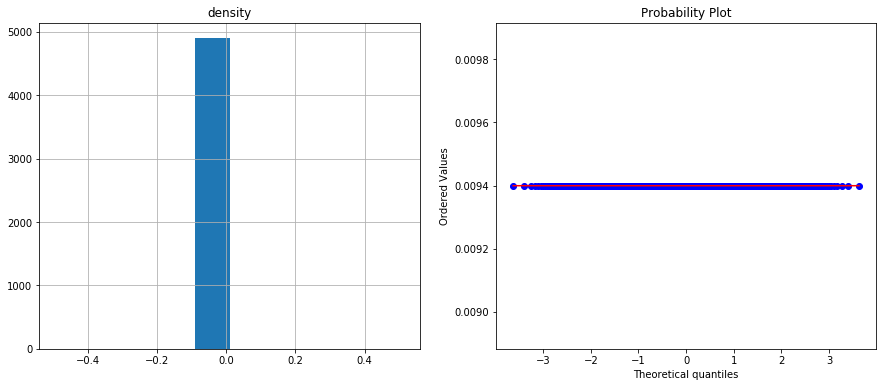

optimal Lambda:  -140.70509238619172


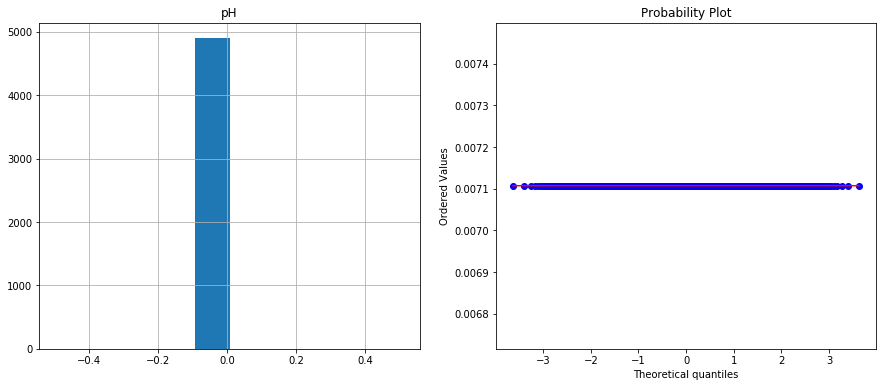

optimal Lambda:  -3.043990465359524


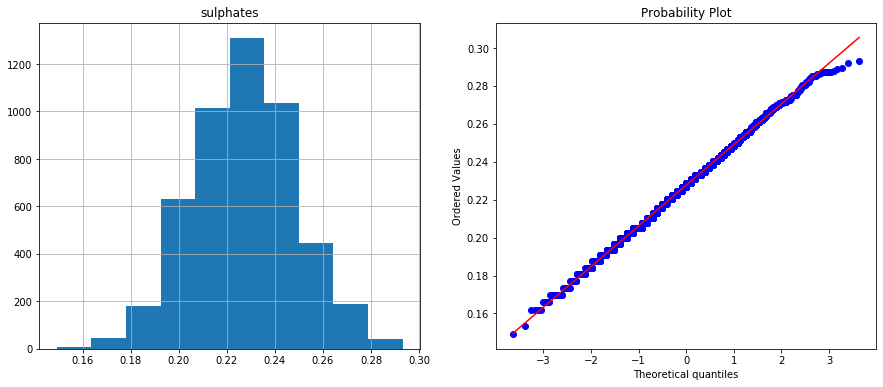

optimal Lambda:  -1.6972873980696799


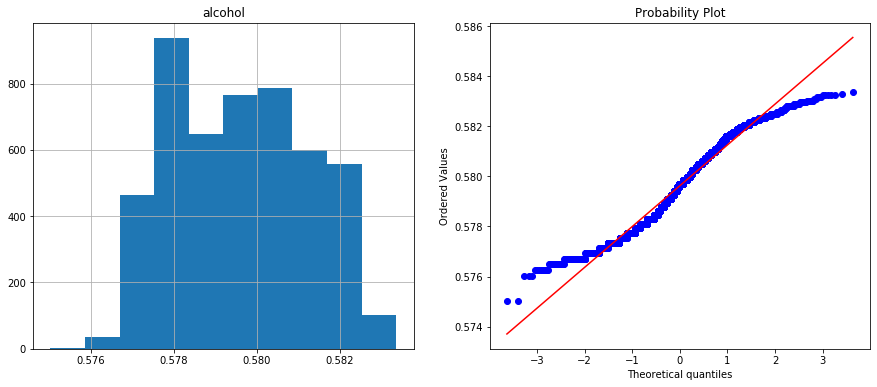

In [141]:
import scipy.stats as stats

for feature in num_feature:
    dataset[feature], param = stats.boxcox(dataset[feature]+1)
    print('optimal Lambda: ',param)
    diagnostic_plots(dataset,feature)

## SVM
here, average accuracy that i got is 79.7%

In [280]:
from sklearn import svm
clf = svm.SVC()

### Stratified  K Fold CV

In [207]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
accuracy=[]
skf = StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(X,Y)
for train_index,test_index in skf.split(X,Y):
    print("Train:",train_index,"Validation:",test_index)
    X1_train,X1_test= X.iloc[train_index], X.iloc[test_index]
    y1_train,y1_test= Y.iloc[train_index], Y.iloc[test_index]
    
    clf.fit(X1_train,y1_train)
    prediction = clf.predict(X1_test)
    score = accuracy_score(prediction,y1_test)
    accuracy.append(score)
print(accuracy)
np.array(accuracy).mean()

Train: [ 478  479  480 ... 4895 4896 4897] Validation: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 

C:\Users\Manthan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Manthan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train: [   0    1    2 ... 4895 4896 4897] Validation: [478 479 480 481 482 483 484 485 486 487 488 489 490 492 493 494 495 496
 497 498 499 500 501 502 503 504 505 506 508 510 511 512 513 515 516 517
 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535
 536 537 538 539 540 541 542 543 544 545 546 547 549 556 557 558 559 561
 562 563 564 565 566 567 568 569 570 571 572 573 574 575 576 577 578 579
 580 581 582 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597
 598 599 600 601 602 603 604 605 606 607 608 609 610 611 612 613 614 615
 616 617 618 619 620 621 622 623 624 625 626 627 628 629 630 631 632 633
 634 635 636 637 638 639 640 641 642 643 644 645 646 647 648 649 650 651
 652 653 654 655 656 657 658 659 660 661 662 663 664 665 666 667 668 669
 670 671 672 673 674 675 676 677 678 679 680 681 682 683 684 685 686 687
 688 689 690 691 692 693 694 695 696 697 698 699 700 701 702 703 704 705
 706 707 708 709 710 711 712 713 714 715 716 717 718 719 720 721 722 

C:\Users\Manthan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Manthan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train: [   0    1    2 ... 4895 4896 4897] Validation: [ 943  944  945  957  958  961  968  969  970  971  973  978  981  989
  994  995  996  997  998  999 1000 1001 1002 1003 1004 1005 1006 1007
 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017 1018 1019 1020 1021
 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031 1032 1033 1034 1035
 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045 1046 1047 1048 1049
 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059 1060 1061 1062 1063
 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073 1074 1075 1076 1077
 1078 1079 1080 1081 1082 1083 1084 1085 1086 1087 1088 1089 1090 1091
 1092 1093 1094 1095 1096 1097 1098 1099 1100 1101 1102 1103 1104 1105
 1106 1107 1108 1109 1110 1111 1112 1113 1114 1115 1116 1117 1118 1119
 1120 1121 1122 1123 1124 1125 1126 1127 1128 1129 1130 1131 1132 1133
 1134 1135 1136 1137 1138 1139 1140 1141 1142 1143 1144 1145 1146 1147
 1148 1149 1150 1151 1152 1153 1154 1155 1156 1157 1158 1159 1160 1161
 1162 1163 1164 1165 1

C:\Users\Manthan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Manthan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train: [   0    1    2 ... 4895 4896 4897] Validation: [1362 1365 1371 1374 1375 1378 1380 1381 1386 1388 1394 1395 1396 1397
 1398 1400 1402 1403 1406 1408 1412 1419 1428 1432 1437 1453 1464 1467
 1470 1493 1494 1495 1497 1500 1503 1504 1505 1507 1508 1509 1510 1511
 1512 1513 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525
 1526 1527 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539
 1540 1541 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553
 1554 1555 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567
 1568 1569 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581
 1582 1583 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595
 1596 1597 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609
 1610 1611 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623
 1624 1625 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637
 1638 1639 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651
 1652 1653 1654 1655 1

C:\Users\Manthan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Manthan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train: [   0    1    2 ... 4895 4896 4897] Validation: [1899 1907 1908 1915 1920 1937 1948 1952 1967 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029
 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043
 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057
 2058 2059 2060 2061 2062 2063 2064 2065 2066 2067 2068 2069 2070 2071
 2072 2073 2074 2075 2076 2077 2078 2079 2080 2081 2082 2083 2084 2085
 2086 2087 2088 2089 2090 2091 2092 2093 2094 2095 2096 2097 2098 2099
 2100 2101 2102 2103 2104 2105 2106 2107 2108 2109 2110 2111 2112 2113
 2114 2115 2116 2117 2118 2119 2120 2121 2122 2123 2124 2125 2126 2127
 2128 2129 2130 2131 2132 2133 2134 2135 2136 2137 2138 2139 2140 2141
 2142 2143 2144 2145 2

C:\Users\Manthan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Manthan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train: [   0    1    2 ... 4895 4896 4897] Validation: [2415 2416 2417 2418 2419 2421 2422 2423 2424 2425 2426 2427 2428 2429
 2430 2431 2432 2433 2434 2435 2436 2437 2438 2439 2440 2441 2442 2443
 2444 2445 2446 2447 2448 2449 2450 2451 2453 2454 2455 2456 2457 2458
 2459 2460 2461 2462 2464 2465 2466 2467 2468 2469 2470 2472 2473 2475
 2476 2478 2479 2480 2481 2482 2483 2484 2485 2486 2487 2488 2489 2490
 2491 2492 2493 2494 2495 2496 2497 2498 2499 2500 2501 2502 2503 2504
 2505 2506 2508 2509 2510 2511 2512 2513 2516 2517 2519 2520 2523 2524
 2527 2528 2529 2530 2531 2532 2533 2535 2536 2537 2538 2539 2540 2541
 2542 2543 2544 2545 2546 2547 2548 2549 2550 2551 2552 2556 2559 2560
 2561 2562 2563 2564 2565 2567 2568 2569 2570 2571 2572 2573 2574 2575
 2576 2577 2579 2580 2587 2589 2590 2592 2593 2595 2596 2597 2598 2599
 2601 2602 2605 2606 2607 2608 2609 2610 2611 2613 2614 2615 2616 2617
 2618 2619 2620 2621 2622 2623 2624 2625 2626 2627 2628 2629 2630 2631
 2632 2633 2634 2635 2

C:\Users\Manthan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Manthan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train: [   0    1    2 ... 4895 4896 4897] Validation: [2914 2915 2916 2918 2919 2920 2921 2923 2924 2925 2929 2932 2933 2934
 2935 2936 2937 2940 2941 2942 2944 2946 2947 2948 2949 2950 2951 2952
 2953 2955 2956 2957 2958 2961 2962 2964 2966 2967 2968 2969 2970 2971
 2972 2973 2974 2975 2976 2977 2978 2982 2983 2984 2989 2993 2994 2995
 2996 2997 2998 2999 3000 3001 3002 3003 3004 3005 3006 3007 3008 3009
 3010 3011 3012 3013 3014 3015 3016 3017 3018 3019 3020 3021 3022 3023
 3024 3025 3026 3027 3028 3029 3030 3031 3032 3033 3034 3035 3036 3037
 3038 3039 3040 3041 3042 3043 3044 3045 3046 3047 3048 3049 3050 3051
 3052 3053 3054 3055 3056 3057 3058 3059 3060 3061 3062 3063 3064 3065
 3066 3067 3068 3069 3070 3071 3072 3073 3074 3075 3076 3077 3078 3079
 3080 3081 3082 3083 3084 3085 3086 3087 3088 3089 3090 3091 3092 3093
 3094 3095 3096 3097 3098 3099 3100 3101 3102 3103 3104 3105 3106 3107
 3108 3109 3110 3111 3112 3113 3114 3115 3116 3117 3118 3119 3120 3121
 3122 3123 3124 3125 3

C:\Users\Manthan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Manthan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train: [   0    1    2 ... 4895 4896 4897] Validation: [3373 3378 3380 3381 3382 3386 3389 3391 3410 3414 3415 3419 3421 3422
 3433 3442 3445 3447 3448 3449 3450 3451 3452 3453 3454 3455 3456 3457
 3458 3459 3460 3461 3462 3463 3464 3465 3466 3467 3468 3469 3470 3471
 3472 3473 3474 3475 3476 3477 3478 3479 3480 3481 3482 3483 3484 3485
 3486 3487 3488 3489 3490 3491 3492 3493 3494 3495 3496 3497 3498 3499
 3500 3501 3502 3503 3504 3505 3506 3507 3508 3509 3510 3511 3512 3513
 3514 3515 3516 3517 3518 3519 3520 3521 3522 3523 3524 3525 3526 3527
 3528 3529 3530 3531 3532 3533 3534 3535 3536 3537 3538 3539 3540 3541
 3542 3543 3544 3545 3546 3547 3548 3549 3550 3551 3552 3553 3554 3555
 3556 3557 3558 3559 3560 3561 3562 3563 3564 3565 3566 3567 3568 3569
 3570 3571 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583
 3584 3585 3586 3587 3588 3589 3590 3591 3592 3593 3594 3595 3596 3597
 3598 3599 3600 3601 3602 3603 3604 3605 3606 3607 3608 3609 3610 3611
 3612 3613 3614 3615 3

C:\Users\Manthan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Manthan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train: [   0    1    2 ... 4895 4896 4897] Validation: [3692 3693 3696 3720 3723 3726 3727 3728 3739 3740 3741 3742 3743 3744
 3745 3750 3754 3761 3764 3778 3779 3785 3815 3824 3829 3830 3843 3851
 3853 3864 3875 3898 3904 3905 3906 3907 3908 3909 3912 3914 3915 3918
 3922 3932 3947 3953 3962 3963 3968 3969 3970 3971 3972 3973 3974 3975
 3976 3977 3978 3979 3980 3981 3982 3983 3984 3985 3986 3987 3988 3989
 3990 3991 3992 3993 3994 3995 3996 3997 3998 3999 4000 4001 4002 4003
 4004 4005 4006 4007 4008 4009 4010 4011 4012 4013 4014 4015 4016 4017
 4018 4019 4020 4021 4022 4023 4024 4025 4026 4027 4028 4029 4030 4031
 4032 4033 4034 4035 4036 4037 4038 4039 4040 4041 4042 4043 4044 4045
 4046 4047 4048 4049 4050 4051 4052 4053 4054 4055 4056 4057 4058 4059
 4060 4061 4062 4063 4064 4065 4066 4067 4068 4069 4070 4071 4072 4073
 4074 4075 4076 4077 4078 4079 4080 4081 4082 4083 4084 4085 4086 4087
 4088 4089 4090 4091 4092 4093 4094 4095 4096 4097 4098 4099 4100 4101
 4102 4103 4104 4105 4

C:\Users\Manthan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Manthan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train: [   0    1    2 ... 4434 4435 4436] Validation: [4242 4261 4266 4267 4276 4307 4314 4315 4317 4318 4319 4322 4332 4333
 4334 4335 4336 4337 4338 4339 4340 4347 4406 4409 4411 4412 4413 4414
 4437 4438 4439 4440 4441 4442 4443 4444 4445 4446 4447 4448 4449 4450
 4451 4452 4453 4454 4455 4456 4457 4458 4459 4460 4461 4462 4463 4464
 4465 4466 4467 4468 4469 4470 4471 4472 4473 4474 4475 4476 4477 4478
 4479 4480 4481 4482 4483 4484 4485 4486 4487 4488 4489 4490 4491 4492
 4493 4494 4495 4496 4497 4498 4499 4500 4501 4502 4503 4504 4505 4506
 4507 4508 4509 4510 4511 4512 4513 4514 4515 4516 4517 4518 4519 4520
 4521 4522 4523 4524 4525 4526 4527 4528 4529 4530 4531 4532 4533 4534
 4535 4536 4537 4538 4539 4540 4541 4542 4543 4544 4545 4546 4547 4548
 4549 4550 4551 4552 4553 4554 4555 4556 4557 4558 4559 4560 4561 4562
 4563 4564 4565 4566 4567 4568 4569 4570 4571 4572 4573 4574 4575 4576
 4577 4578 4579 4580 4581 4582 4583 4584 4585 4586 4587 4588 4589 4590
 4591 4592 4593 4594 4

C:\Users\Manthan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Manthan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0.7918367346938775, 0.7918367346938775, 0.7938775510204081, 0.7857142857142857, 0.7877551020408163, 0.8142857142857143, 0.7959183673469388, 0.8224489795918367, 0.8139059304703476, 0.7750511247443763]


0.797263052460248

## Naive Bayes
Here, the average accuracy i got is 78.2%

In [209]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

### Stratified  K Fold CV

In [210]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
accuracy=[]
skf = StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(X,Y)
for train_index,test_index in skf.split(X,Y):
    print("Train:",train_index,"Validation:",test_index)
    X1_train,X1_test= X.iloc[train_index], X.iloc[test_index]
    y1_train,y1_test= Y.iloc[train_index], Y.iloc[test_index]
    
    clf.fit(X1_train,y1_train)
    prediction = clf.predict(X1_test)
    score = accuracy_score(prediction,y1_test)
    accuracy.append(score)
print(accuracy)
np.array(accuracy).mean()

Train: [ 478  479  480 ... 4895 4896 4897] Validation: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 

C:\Users\Manthan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Manthan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Manthan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Manthan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

0.7821301281248696

### Finally, after testing above algorithms, i have decided to use K-NN because with SVM it generally has high variance...

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr=LogisticRegression()
lr.fit(X_test,y_test)
prediction = lr.predict(X_test)
score = accuracy_score(prediction,y_test)
print(score)

0.7806122448979592


C:\Users\Manthan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Manthan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=125)
clf.fit(X_train,np.ravel(y_train))
prediction = clf.predict(X_test)
score = accuracy_score(prediction,y_test)
print(score)

0.7928571428571428


## Applying ANN


In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 10, init = 'he_uniform',activation='relu',input_dim = 2))
classifier.add(Dropout(0.5))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 8, init = 'he_uniform',activation='relu'))
classifier.add(Dropout(0.4))

#Adding Third Layer
classifier.add(Dense(output_dim = 3, init = 'he_uniform',activation='relu'))
classifier.add(Dropout(0.1))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=2, units=10, kernel_initializer="he_uniform")`
  if sys.path[0] == '':
C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=8, kernel_initializer="he_uniform")`
  from ipykernel import kernelapp as app
C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=3, kernel_initializer="he_uniform")`
C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
C:\Users\Manthan\Anaconda3\envs\tensorflow\lib\site-packag

Train on 2625 samples, validate on 1293 samples
Epoch 1/100
2625/2625 [==============================] - 1s 286us/step - loss: 1.0877 - accuracy: 0.7817 - val_loss: 0.6713 - val_accuracy: 0.7865
Epoch 2/100
2625/2625 [==============================] - 0s 190us/step - loss: 0.8072 - accuracy: 0.7836 - val_loss: 0.6369 - val_accuracy: 0.7865
Epoch 3/100
2625/2625 [==============================] - 0s 187us/step - loss: 0.6819 - accuracy: 0.7836 - val_loss: 0.6074 - val_accuracy: 0.7865
Epoch 4/100
2625/2625 [==============================] - 0s 182us/step - loss: 0.6203 - accuracy: 0.7836 - val_loss: 0.5867 - val_accuracy: 0.7865
Epoch 5/100
2625/2625 [==============================] - 0s 182us/step - loss: 0.6048 - accuracy: 0.7836 - val_loss: 0.5730 - val_accuracy: 0.7865
Epoch 6/100
2625/2625 [==============================] - 0s 184us/step - loss: 0.5703 - accuracy: 0.7836 - val_loss: 0.5559 - val_accuracy: 0.7865
Epoch 7/100
2625/2625 [==============================] - 0s 181us/step

2625/2625 [==============================] - 0s 182us/step - loss: 0.5211 - accuracy: 0.7836 - val_loss: 0.5173 - val_accuracy: 0.7865
Epoch 56/100
2625/2625 [==============================] - 0s 176us/step - loss: 0.5219 - accuracy: 0.7836 - val_loss: 0.5165 - val_accuracy: 0.7865
Epoch 57/100
2625/2625 [==============================] - 0s 173us/step - loss: 0.5205 - accuracy: 0.7836 - val_loss: 0.5160 - val_accuracy: 0.7865
Epoch 58/100
2625/2625 [==============================] - 0s 180us/step - loss: 0.5216 - accuracy: 0.7836 - val_loss: 0.5165 - val_accuracy: 0.7865
Epoch 59/100
2625/2625 [==============================] - 0s 177us/step - loss: 0.5204 - accuracy: 0.7836 - val_loss: 0.5174 - val_accuracy: 0.7865
Epoch 60/100
2625/2625 [==============================] - 0s 179us/step - loss: 0.5211 - accuracy: 0.7836 - val_loss: 0.5170 - val_accuracy: 0.7865
Epoch 61/100
2625/2625 [==============================] - 0s 176us/step - loss: 0.5220 - accuracy: 0.7836 - val_loss: 0.5169 

In [35]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

0.7795918367346939
